# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html

url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
marstemp_soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
rows = marstemp_soup.find_all('tr')



### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_facts = []

# Loop through the scraped data to create a list of rows


# Loop through the rows
for row in rows:
    # Find all the cells in the row
    cells = row.find_all('td')
    # Extract the text from the cells
    row_data = [cell.text for cell in cells]
    # Append the data to the list
    mars_facts.append(row_data)


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create the DataFrame
df = pd.DataFrame(mars_facts, columns=column_names)

df_new = df.drop(df.index[0])



In [8]:
# Confirm DataFrame was created successfully
# Print the DataFrame
print(df_new)

        id terrestrial_date   sol   ls month min_temp pressure
1        2       2012-08-16    10  155     6    -75.0    739.0
2       13       2012-08-17    11  156     6    -76.0    740.0
3       24       2012-08-18    12  156     6    -76.0    741.0
4       35       2012-08-19    13  157     6    -74.0    732.0
5       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1863  1889       2018-02-23  1973  133     5    -78.0    730.0
1864  1892       2018-02-24  1974  134     5    -77.0    729.0
1865  1894       2018-02-25  1975  134     5    -76.0    729.0
1866  1893       2018-02-26  1976  135     5    -77.0    728.0
1867  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
print(df_new.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [10]:
# Change data types for data analysis
df_new["id"] = df_new["id"].astype(int)
df_new["sol"] = df_new["sol"].astype(int)
df_new["ls"] = df_new["ls"].astype(int)
df_new["min_temp"] = df_new["min_temp"].astype(float)
df_new["month"] = df_new["month"].astype(int)
df_new["pressure"] = df_new["pressure"].astype(float)
df_new["terrestrial_date"] = pd.to_datetime(df_new["terrestrial_date"])



In [11]:
# Confirm type changes were successful by examining data types again

print(df_new.dtypes)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
months_on_mars = df_new["month"].nunique()
months_on_mars

12

In [13]:
# 2. How many Martian days' worth of data are there?
unique_days_date=df_new['sol'].nunique()
print(unique_days_date)

1867


In [14]:
# 3. What is the average low temperature by month?
df_new["month"] = pd.DatetimeIndex(df_new["terrestrial_date"]).month
df_new.groupby("month")["min_temp"].mean()

month
1    -76.988506
2    -76.909091
3    -77.349206
4    -76.098592
5    -75.573427
6    -75.671233
7    -76.177305
8    -75.851613
9    -75.816092
10   -75.685083
11   -75.537975
12   -75.994220
Name: min_temp, dtype: float64

<AxesSubplot:ylabel='month'>

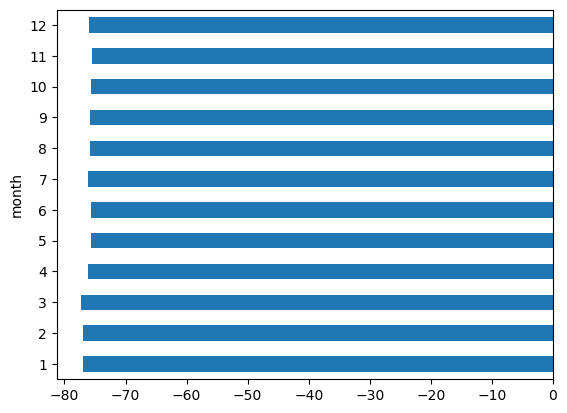

In [15]:
# Plot the average temperature by month
df_new["month"] = pd.DatetimeIndex(df_new["terrestrial_date"]).month
chart = df_new.groupby("month")["min_temp"].mean()

chart.plot.barh()



In [16]:
# Identify the coldest and hottest months in Curiosity's location
#coldest
min_avg_temp = df_new['min_temp'].min()
month_min_temp=df_new.loc[df_new['min_temp']==min_avg_temp]
month_min_temp

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1094,1119,2015-12-09,1188,79,12,-90.0,881.0


In [17]:
#hottest
month_max_temp=df_new.loc[df_new['min_temp']==max_avg_temp]
month_max_temp

NameError: name 'max_avg_temp' is not defined

In [18]:
# 4. Average pressure by Martian month

df_new["month"] = pd.DatetimeIndex(df_new["terrestrial_date"]).month
df_new.groupby("month")["pressure"].mean()

month
1     861.258621
2     837.967532
3     827.722222
4     817.676056
5     803.601399
6     807.910959
7     822.510638
8     829.606452
9     845.586207
10    865.475138
11    875.481013
12    875.260116
Name: pressure, dtype: float64

<AxesSubplot:ylabel='month'>

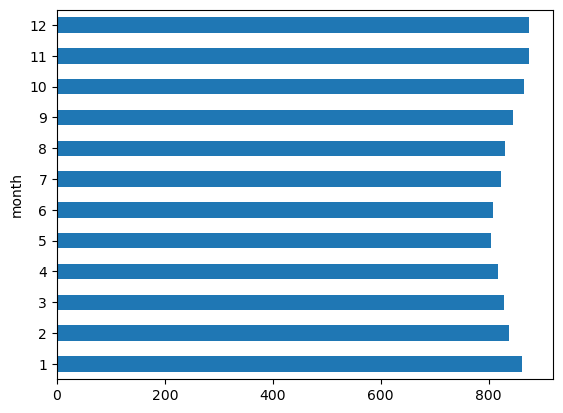

In [19]:
# Plot the average pressure by month
df_new["month"] = pd.DatetimeIndex(df_new["terrestrial_date"]).month
chart = df_new.groupby("month")["pressure"].mean()

chart.plot.barh()


In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?
mars_months = np.unique(df_new['month'])
sols = 0
for mm in mars_months:
    sol_duration = df_new.loc[df_new['month'] == mm, 'sol'].max() - df_new.loc[df_new['month'] == mm, 'sol'].min()
    sols += (sol_duration / 24.66)
# number of Martian days included in the dataset
sol_range = df_new['sol'].max() - df_new['sol'].min()

mars_year = (sol_range/sols)

mars_year

2.442776854509744

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
df_new.to_csv('mars_table.csv',index=False)

In [22]:
browser.quit()